# Mobikwik

Mobikwik is a fintech focusing on mobile wallets and Buy Now Pay Later (BNPL) services. Main services include - 
1. Phone and DTH recharge
2. Bill Payments
3. Shopping in local stores
4. Transfer money to bank

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/mobikwik/mobikwik.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(53210, 27)

## Preprocessing

In [6]:
processor = Processor('./../../data/config.json')

In [7]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [8]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [9]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [10]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [11]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.032*"mobikwik" + 0.025*"number" + 0.018*"account" + 0.016*"help" + '
  '0.014*"kyc" + 0.014*"know" + 0.010*"want" + 0.010*"fraud" + 0.009*"sir" + '
  '0.009*"customer_care"'),
 (1,
  '0.058*"money" + 0.042*"wallet" + 0.040*"mobikwik" + 0.039*"account" + '
  '0.021*"refund" + 0.018*"transaction" + 0.017*"help" + 0.013*"bank_account" '
  '+ 0.013*"transfer" + 0.012*"bank"'),
 (2,
  '0.029*"mobikwik" + 0.017*"app" + 0.013*"issue" + 0.012*"reply" + '
  '0.011*"response" + 0.011*"customer_care" + 0.010*"days" + 0.010*"team" + '
  '0.009*"payment" + 0.009*"ticket"'),
 (3,
  '0.051*"mobikwik" + 0.039*"wallet" + 0.035*"rs" + 0.019*"code" + '
  '0.017*"payment" + 0.017*"account" + 0.016*"sign_mobikwik" + '
  '0.016*"use_referral" + 0.015*"fraud" + 0.015*"credit_card"'),
 (4,
  '0.030*"mobikwik" + 0.019*"money" + 0.019*"use" + 0.015*"dont" + '
  '0.015*"fraud" + 0.014*"app" + 0.013*"days" + 0.010*"people" + 0.008*"time" '
  '+ 0.008*"help"'),
 (5,
  '0.088*"mobikwik" + 0.054*"rs" + 0.0

In [12]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [13]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.024*"help" + 0.021*"mobikwik" + 0.019*"team" + 0.019*"days" + '
  '0.013*"dear" + 0.013*"issue" + 0.011*"dm" + 0.011*"reply" + '
  '0.011*"response" + 0.010*"ticket"'),
 (1,
  '0.032*"payment" + 0.016*"mobikwik" + 0.014*"credit_card" + 0.009*"love" + '
  '0.008*"paytm" + 0.008*"time" + 0.008*"option" + 0.007*"hai" + '
  '0.007*"chinese" + 0.006*"month"'),
 (2,
  '0.097*"app" + 0.086*"indian" + 0.058*"support" + 0.037*"mobikwik" + '
  '0.036*"use" + 0.031*"payment" + 0.025*"download" + 0.024*"apps" + '
  '0.017*"time" + 0.016*"best"'),
 (3,
  '0.057*"mobikwik" + 0.037*"account" + 0.032*"money" + 0.032*"transaction" + '
  '0.030*"wallet" + 0.029*"refund" + 0.025*"payment" + 0.015*"rs" + '
  '0.014*"help" + 0.013*"recharge"'),
 (4,
  '0.024*"mobikwik" + 0.022*"money" + 0.018*"wallet" + 0.015*"payment" + '
  '0.012*"says" + 0.012*"time" + 0.009*"guys" + 0.009*"ticket_id" + '
  '0.008*"join" + 0.007*"bank"'),
 (5,
  '0.050*"mobikwik" + 0.017*"india" + 0.015*"products" + 0.015*"boo

### Evaluation

In [14]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -6.085253142660287


In [15]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -5.94090391816445


## Hyper-parameter tuning

### Pre-COVID

In [16]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/mobikwik/pre.csv")

100%|██████████| 780/780 [1:41:27<00:00,  7.80s/it]


In [17]:
# pre_df_result = pd.read_csv("./../../data/fintech/mobikwik/pre.csv")

In [18]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
25,75.0% Corpus,2,asymmetric,0.01,-2.996087
15,75.0% Corpus,2,0.9099999999999999,0.01,-3.038487
400,100% Corpus,2,0.61,0.01,-3.089582
405,100% Corpus,2,0.9099999999999999,0.01,-3.095156
410,100% Corpus,2,symmetric,0.01,-3.104404
85,75.0% Corpus,4,asymmetric,0.01,-3.109877
395,100% Corpus,2,0.31,0.01,-3.113892
445,100% Corpus,3,asymmetric,0.01,-3.154533
55,75.0% Corpus,3,asymmetric,0.01,-3.160254
475,100% Corpus,4,asymmetric,0.01,-3.173140


In [30]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.61',
                                        '0.01')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

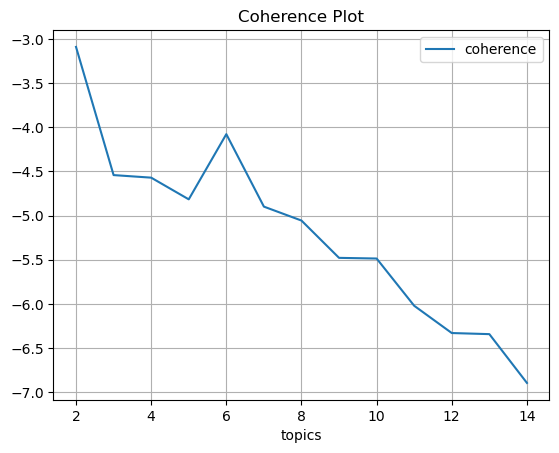

In [31]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [32]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For pre-COVID period, 2 topics model is having the best coherence score.

In [33]:
pre_df_result[pre_df_result['Topics'] == 2].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
25,75.0% Corpus,2,asymmetric,0.01,-2.996087
15,75.0% Corpus,2,0.9099999999999999,0.01,-3.038487
400,100% Corpus,2,0.61,0.01,-3.089582
405,100% Corpus,2,0.9099999999999999,0.01,-3.095156
410,100% Corpus,2,symmetric,0.01,-3.104404


### Post-COVID

In [23]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/mobikwik/post.csv")

100%|██████████| 780/780 [2:50:04<00:00, 13.08s/it]  


In [24]:
# post_df_result = pd.read_csv("./../../data/fintech/mobikwik/post.csv")

In [25]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
28,75.0% Corpus,2,asymmetric,0.9099999999999999,-3.032945
11,75.0% Corpus,2,0.61,0.31,-3.071636
26,75.0% Corpus,2,asymmetric,0.31,-3.084442
404,100% Corpus,2,0.61,symmetric,-3.098285
5,75.0% Corpus,2,0.31,0.01,-3.101236
15,75.0% Corpus,2,0.9099999999999999,0.01,-3.104879
10,75.0% Corpus,2,0.61,0.01,-3.104911
396,100% Corpus,2,0.31,0.31,-3.112358
397,100% Corpus,2,0.31,0.61,-3.117012
399,100% Corpus,2,0.31,symmetric,-3.118378


In [34]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        '0.61',
                                        'symmetric')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

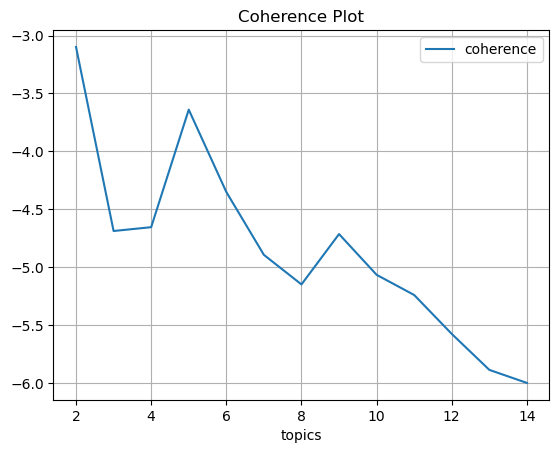

In [35]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [36]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For the post-COVID period, the model with number of topics equal to 2 gives the best coherence score.

In [29]:
post_df_result[(post_df_result['Topics'] == 2)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
28,75.0% Corpus,2,asymmetric,0.9099999999999999,-3.032945
11,75.0% Corpus,2,0.61,0.31,-3.071636
26,75.0% Corpus,2,asymmetric,0.31,-3.084442
404,100% Corpus,2,0.61,symmetric,-3.098285
5,75.0% Corpus,2,0.31,0.01,-3.101236


## Final Models

### Pre-COVID

In [39]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.61,
                                        eta=0.01)

In [40]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -3.0801339942224555


### Post-COVID

In [41]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha=0.61,
                                        eta='symmetric')

In [42]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  -3.110776776720428


## Inferencing

### Pre-COVID

In [43]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist())

In [44]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.6401,"mobikwik, rs, wallet, supercash, use, payment,...","[piss, drinking, human, crap, eating, fucking,..."
1,0,0.8796,"mobikwik, rs, wallet, supercash, use, payment,...","[irctc_uts, app, offer, use, mobikwik, superca..."
2,1,0.9396,"mobikwik, money, account, wallet, help, refund...","[dont, care, customers, misbehaving, customers..."
3,1,0.9396,"mobikwik, money, account, wallet, help, refund...","[dont, care, customers, misbehaving, customers..."
4,1,0.6220,"mobikwik, money, account, wallet, help, refund...","[stay_away, recharged, jio, phonepe, debited, ..."
...,...,...,...,...
16901,0,0.8744,"mobikwik, rs, wallet, supercash, use, payment,...","[sign_mobikwik, use_referral, code, rse, bz, r..."
16902,1,0.7210,"mobikwik, money, account, wallet, help, refund...",[money]
16903,1,0.8935,"mobikwik, money, account, wallet, help, refund...","[understand, big, money, meand, team, daysretu..."
16904,1,0.9350,"mobikwik, money, account, wallet, help, refund...","[seriously, raised, issue, confidently, giving..."


In [45]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['mobikwik, rs, wallet, supercash, use, payment, app, cashback, offer, upi',
       'mobikwik, money, account, wallet, help, refund, transaction, fraud, number, days'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Promotion - Cashback and Referrals
   - Key terms: 'mobikwik, rs, wallet, supercash, use, payment, app, cashback, offer, upi'

2. Topic Number: 1
   - Probable topic title: Wallet Issues
   - Key terms: 'mobikwik, money, account, wallet, help, refund, transaction, fraud, number, days'

In [46]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '10493'), Text(0, 0, '6413')]

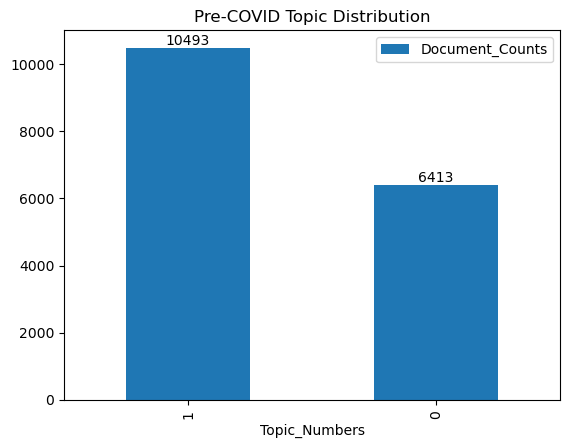

In [47]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

Topics don't exhibit a uniform distribution. Topics related to wallet issues are more prominent.

### Post-COVID

In [48]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist()
)

In [49]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1,0.9116,"mobikwik, payment, wallet, money, account, tra...","[dmed, query, kindly, resolve, priority, basis]"
1,1,0.8957,"mobikwik, payment, wallet, money, account, tra...","[sir, ive, mobikwk, debit_card, try, set, upi,..."
2,0,0.8479,"app, mobikwik, indian, truly_indian, payments,...","[bahut, company, use, application]"
3,0,0.6592,"app, mobikwik, indian, truly_indian, payments,...","[company, hai, mere, refund, nahi, diya, months]"
4,1,0.8815,"mobikwik, payment, wallet, money, account, tra...","[respond, dm, assured, adjustment]"
...,...,...,...,...
28298,1,0.8890,"mobikwik, payment, wallet, money, account, tra...","[hello, need, help, light, payment, contact]"
28299,1,0.8811,"mobikwik, payment, wallet, money, account, tra...","[recharge, update, vodafone, account]"
28300,1,0.9404,"mobikwik, payment, wallet, money, account, tra...","[dear, team, plz_help, able_login, ac, pl, hel..."
28301,1,0.9135,"mobikwik, payment, wallet, money, account, tra...","[dear, team, help, able_login, ac, bit, urgent]"


In [50]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['mobikwik, payment, wallet, money, account, transaction, rs, refund, recharge, help',
       'app, mobikwik, indian, truly_indian, payments, support, use, payment, download, apps'],
      dtype=object)

In [52]:
post_df_topic_sents_keywords[post_df_topic_sents_keywords['Topic_Keywords'] == 'app, mobikwik, indian, truly_indian, payments, support, use, payment, download, apps']['Text'].values[:10]

array([list(['bahut', 'company', 'use', 'application']),
       list(['company', 'hai', 'mere', 'refund', 'nahi', 'diya', 'months']),
       list(['discounts', 'offered', 'restaurant', 'payment_gateway', 'like', 'mobikwik', 'mastercard']),
       list(['number_belong', 'mobikwik', 'request_share', 'sensitive_details', 'thanks']),
       list(['rohit', 'request_share', 'personal_details', 'handle', 'referring', 'belong', 'mobikwik', 'thanks']),
       list(['following', 'loan', 'provider', 'apps', 'hacking', 'contacts', 'people', 'unable', 'pay', 'os', 'loan', 'dues', 'data', 'leaked', 'china', 'control', 'urgently', 'data', 'privacy', 'compromised']),
       list(['guess', 'sucks', 'terms', 'service', 'support', 'yeah']),
       list(['like', 'know', 'promtion', 'means', 'recharged_jio', 'app', 'transactio', 'mobikwik', 'im', 'getting', 'cashback', 'customer', 'support', 'worthless', 'think']),
       list(['request_share', 'mobikwik', 'wallet', 'password_creditdebit', 'card_pin', 'otp

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Issues and Queries
   - Key terms: 'mobikwik, payment, wallet, money, account, transaction, rs, refund, recharge, help'

2. Topic Number: 1
   - Probable topic title: Promotion - Social
   - Key terms: 'app, mobikwik, indian, truly_indian, payments, support, use, payment, download, apps'

In [53]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '16169'), Text(0, 0, '12134')]

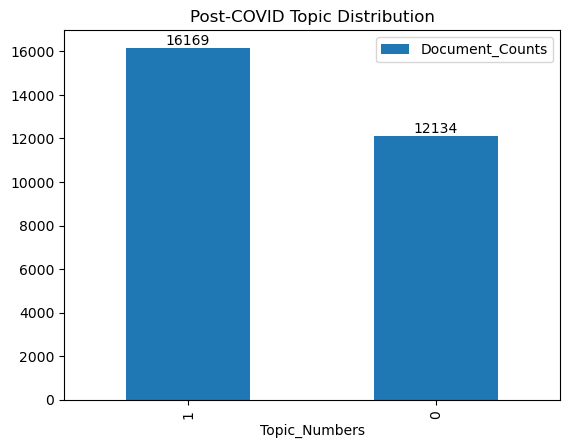

In [54]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

The distribution of topics is not uniform. Company is promoting aggresively on social media platforms.


In [56]:
# Save outputs
pre_df_topic_sents_keywords.to_csv('./../../data/fintech/mobikwik/mobikwik_pre_output.csv', index=True)
post_df_topic_sents_keywords.to_csv('./../../data/fintech/mobikwik/mobikwik_post_output.csv', index=True)